## <3-4 트랜스포머에 적용된 기술들>  
트랜스포머가 좋은 성능을 내는 데는 앞에서 살펴본 셀프 어텐션 말고도 다양한 기법이 적용됐기 때문입니다.  
이번 절에서는 셀프 어텐션 외에 트랜스포머의 주요 요소들을 살펴보겠습니다.

### 트랜스포머 블록
---  
다음 그림은 트랜스포머 모델에서 인코더와 디코더 블록 부분을 떼어 다시 그린 것입니다. 인코더와 디코더 블록의 구조는 디테일에서 차이가 있을 뿐 본질적으로는 크게 다르지 않습니다.   
즉, 멀티 헤드 어텐션, 피드포워드 뉴럴 네트워크, 잔차 연결 및 레이어 정규화 등 3가지 구성 요소를 기본으로 합니다. 이 가운데 멀티 헤드 어텐션은 앞 절에서 이미 살펴봤으므로 여기서는 나머지 구성 요소인 피드포워드 뉴럴 네트워크와 잔차 연결 및 레이어 정규화를 차례대로 살펴보겠습니다.

<center><그림 3-40 인코더, 디코더></center>

<p align="center"><img src="https://i.imgur.com/qaMh3TR.png">  

<center>출처 : ratsgo's NLPBOOK</center>

### 피드포워드 뉴럴 네트워크
---  
멀티 헤드 어텐션의 출력은 입력 단어들에 대응하는 벡터 시퀀스입니다. 이후 벡터 각각을 ***피드포워드 뉴럴 네트워크(feedforward neural network)*** 에 입력합니다. 다시 말해 피드포워드 뉴럴 네트워크의 입력은 현재 블록의 멀티 헤드 어텐션의 개별 출력 벡터가 됩니다.

피드포워드 뉴럴 네트워크란 신경망(neural network)의 한 종류로 다음 그림처럼 ***입력층(input layer)*** $(x)$, ***은닉층(hidden layer)*** $(h)$, ***출력층(output layer)*** $(y)$ 3개 계층으로 구성돼 있습니다. 그림의 각 동그라미를 ***뉴런(neuron)*** 이라고 합니다.

<center><그림 3-41 피드포워드 뉴럴 네트워크></center>

![](https://i.imgur.com/MsyHJFC.png)


<center>출처 : ratsgo's NLPBOOK</center>

다음 그림은 뉴런과 뉴런 사이의 계산 과정을 좀 더 자세히 그린 것입니다. 이전 뉴런값 $x_i$와 그에 해당하는 가중치 $w_i$를 가중합한 결과에 ***바이어스(bias)*** $b$를 더해 만듭니다. 가중치들과 바이어스는 학습 과정에서 업데이트됩니다. 그림에서 ***활성 함수(activation function)*** $f$는 현재 계산하고 있는 뉴런의 출력을 일정 범위로 제한하는 역할을 합니다.

<center><그림 3-42 뉴런의 계산 과정></center>

![](http://i.imgur.com/euw7qQu.png)


<center>출처 : ratsgo's NLPBOOK</center>

트랜스포머에서 사용하는 피드포워드 뉴럴 네트워크의 활성 함수는 ***ReLU(rectified linear unit)*** 입니다. ReLU는 다음 수식처럼 정의되며 입력($x$)에 대해 그림 3-43과 같은 그래프 모양을 가집니다. 다시 말해 양수 입력은 그대로 흘려보내되 음수 입력은 모두 0으로 치환해 무시합니다.

<center><수식 3-26 ReLU 정의></center>

<center>𝑓(𝑥)=max(0,𝑥)</center>

<center><그림 3-43 ReLU 그래프></center>  

![](https://i.imgur.com/3acxUWy.png)

<center>출처 : ratsgo's NLPBOOK</center>

이제 피드포워드 뉴럴 네트워크의 계산 과정을 살펴보겠습니다. 입력층 뉴런이 각각 [2 1]이고 그에 해당하는 가중치가 [3 2], 바이어스가 1이라고 가정해 보겠습니다. 그러면 은닉층 첫 번째 뉴런값은 $2 \times 3 + 1 \times 2 + 1 = 9$가 됩니다. 이 값은 양수이므르 ReLU를 통과해도 그대로 살아납니다.

<center><그림 3-44 피드포워드 뉴럴 네트워크 계산 예시(1)></center> 

![](https://i.imgur.com/9fmlFxA.png)


<center>출처 : ratsgo's NLPBOOK</center>

다시 입력이 같고 입력에 대한 가중치가 [2 -3]이라면 은닉층 두 번째 뉴런값은 $2 \times 2 + 1 \times -3 + 1 = 2$가 됩니다. 이 값은 양수이므로 ReLU를 통과해도 그대로 살아남습니다.

<center><그림 3-45 피드포워드 뉴럴 네트워크 계산 예시(2)></center> 

![](https://i.imgur.com/LJuZzfu.png)


<center>출처 : ratsgo's NLPBOOK</center>

다시 입력이 같고 입력에 대한 가중치가 [-4 1]이라면 은닉층 세 번째 뉴런값은 $2 \times -4 + 1 \times 1 + 1 = -6$이 됩니다. 이 값은 음수이므로 ReLU를 통과하면서 0이 됩니다.

<center><그림 3-46 피드포워드 뉴럴 네트워크 계산 예시(3)></center> 

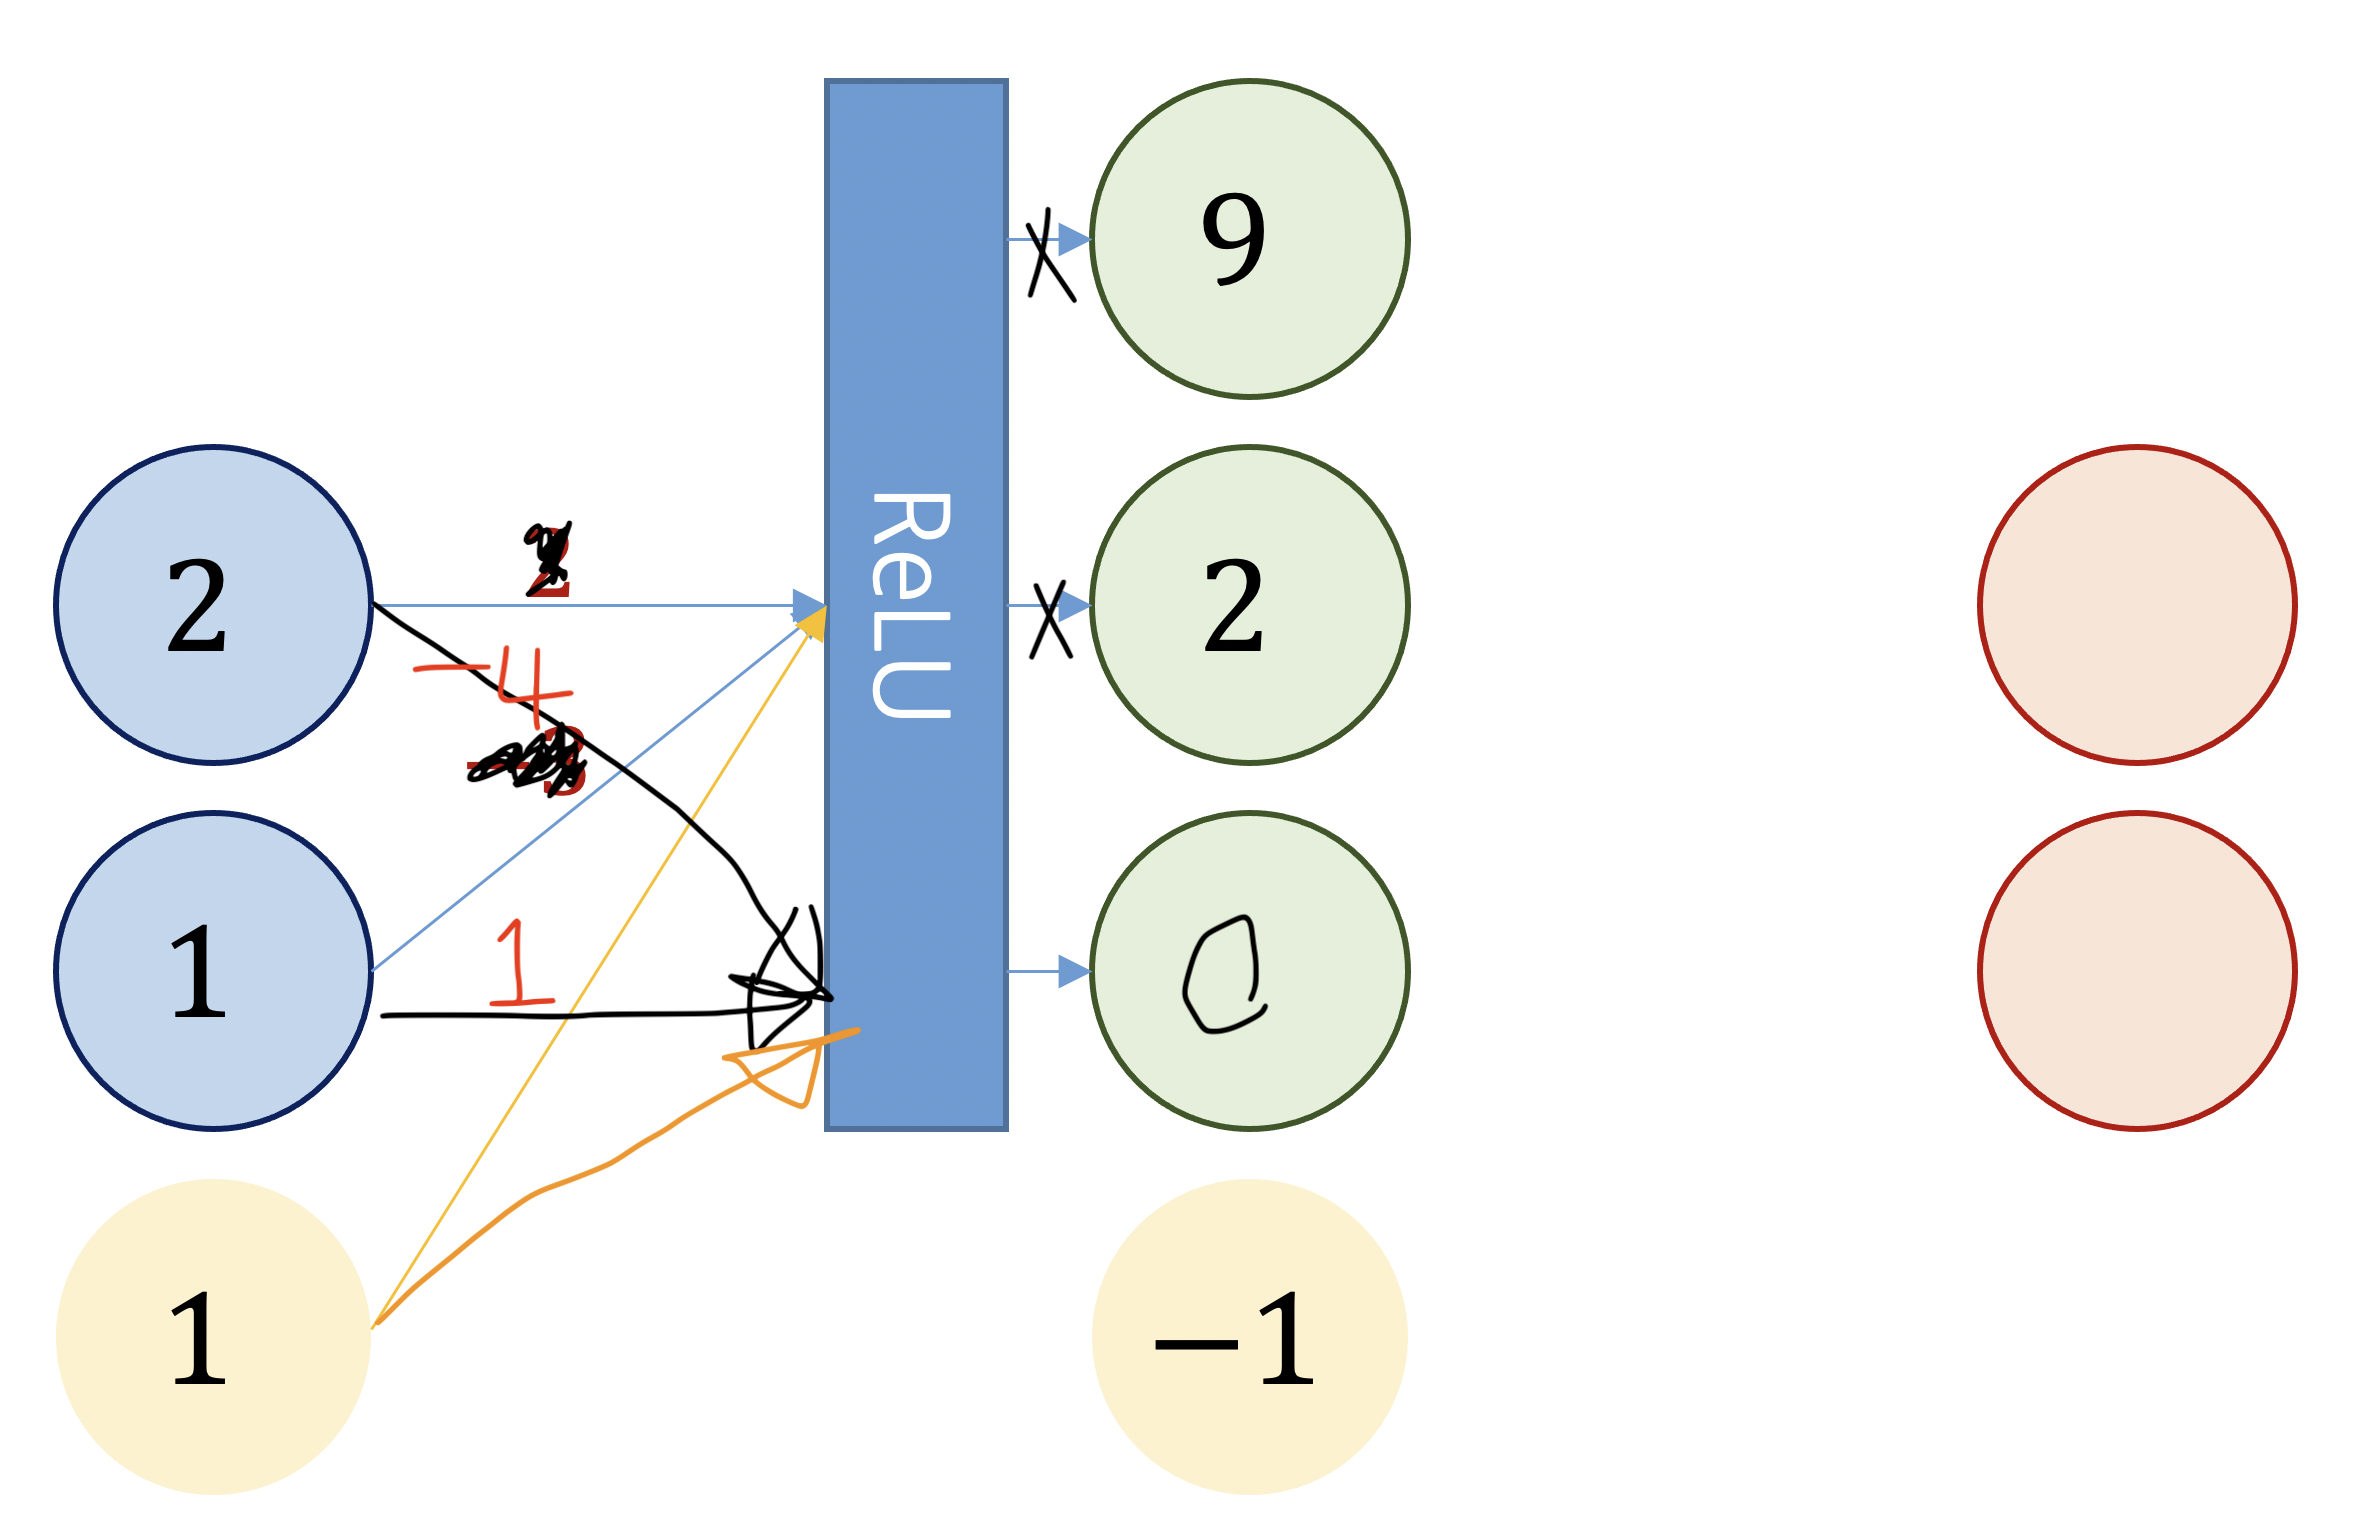)


<center>출처 : ratsgo's NLPBOOK</center>

은닉층 처리를 마치고 이제 출력층을 계산할 차례입니다. 은닉층 뉴런이 각각 [9 2 0]이고 그에 대응하는 가중치가 [-1 1 3], 바이어스가 -1이라면 출력층 첫 번째 뉴런값은 $9 \times -1 + 2 \times 1 + 0 \times 3 -1 = -8$이 됩니다.

<center><그림 3-47 피드포워드 뉴럴 네트워크 계산 예시(4)></center> 

![](https://i.imgur.com/FSPzKfl.png)


<center>출처 : ratsgo's NLPBOOK</center>

다음 그림과 은닉층 뉴런값이 같고 그에 대한 가중치가 [1 2 1]이라면 출력층 두 번째 뉴련값은 $9 \times 1 + 2 \times 2 + 0 \times 1 -1 = 12$가 됩니다.

<center><그림 3-48 피드포워드 뉴럴 네트워크 계산 예시(5)></center> 

![](https://i.imgur.com/dJ4EdNu.png)


<center>출처 : ratsgo's NLPBOOK</center>


이번엔 위의 내용을 코드로 확인해 보겠습니다. 다음 코드는 지금까지 예시를 변수로 정의하는 코드입니다. $x$는 입력이고 $w1$은 입력층-은닉층을 연결하는 가중치, $b1$은 입력층-은닉층을 연결하는 바이어스입니다. $w2$ 은닉층-출력층을 연결하는 가중치, $b2$는 은닉층-출력층을 연결하는 바이어스입니다.

In [1]:
#코드 3-6 피드포워드 뉴럴 네트워크 계산 예시(1)
import torch
x = torch.tensor([2, 1])
w1 = torch.tensor([[3, 2, -4], [2, -3, 1]])
b1 = 1
w2 = torch.tensor([[-1, 1], [1, 2], [3, 1]])
b2 = -1

다음은 실제 계산을 수행하는 코드입니다. 입력 $x$와 $w1$을 행렬곱한 뒤 $b1$을 더한 것이 $h\_ preact$입니다. 여기에 ReLU를 취해 은닉충 $h$를 만듭니다. 마지막으로 $h$와 $w2$를 행렬곱한 뒤 $b2$를 더해 출력층 $y$를 계산합니다.

In [2]:
#코드 3-7 피드포워드 뉴럴 네트워크 계산 예시(2)
h_preact = torch.matmul(x, w1) + b1
h = torch.nn.functional.relu(h_preact)
y = torch.matmul(h, w2) + b2

다음은 이 코드를 수행한 결과를 파이썬 콘솔에서 확인한 것입니다. $h\_ preact$와 $h$는 그림 3-48~50에 이르는 은닉층 손 계산 예시와 똑같은 결과임을 알 수 있습니다. $y$는 그림 3-51과 3-52에 해당하는 출력층 손 계산 예시와 같은 결과입니다.

In [3]:
h_preact

tensor([ 9,  2, -6])

In [4]:
h

tensor([9, 2, 0])

In [5]:
y

tensor([-8, 12])

피드포워드 뉴럴 네트워크의 학습 대상은 가중치와 바이어스입니다. 코드 예시에서는 $w1, b1, w2, b2$가 학습 대상이 됩니다. 이들은 task(예를 들면 기계 번역)를 가장 잘 수행하는 방향으로 학습 과정에서 업데이트됩니다.

한편 트랜스포머에서는 은닉층의 뉴런 개수(즉, 은닉층의 차원 수)를 입력층의 4배로 설정하고 있습니다. 예를 들어 피드포워드 뉴럴 네트워크의 입력 벡터가 768차원일 경우 은닉층은 2,048차원까지 늘렸다가 출력층에서 이를 다시 768차원으로 줄입니다.